# Удаление шума "соль и перец"

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Создадим функцию для искусственного добавления шума

In [5]:
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):

    noisy_image = np.copy(image)
    
    pepper_mask = np.random.random(image.shape[:2]) < pepper_prob
    noisy_image[pepper_mask] = 0
    
    salt_mask = np.random.random(image.shape[:2]) < salt_prob
    noisy_image[salt_mask] = 255
    
    return noisy_image

Функция для применения медианного фильтра к изображению

In [6]:
def median_filter(image, kernel_size=3):
    
    # проверка на нечетность
    if kernel_size % 2 == 0:
        kernel_size += 1

    filtered_image = cv2.medianBlur(image, kernel_size)
    
    return filtered_image

Обработаем изображение

In [18]:
image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Добавляем шум
noisy_image = add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
    
# Применяем медианный фильтр
filtered_image = median_filter(noisy_image, kernel_size=3)


Посмотрим теперь на оригинальное, зашумленное и восстановленное изображения

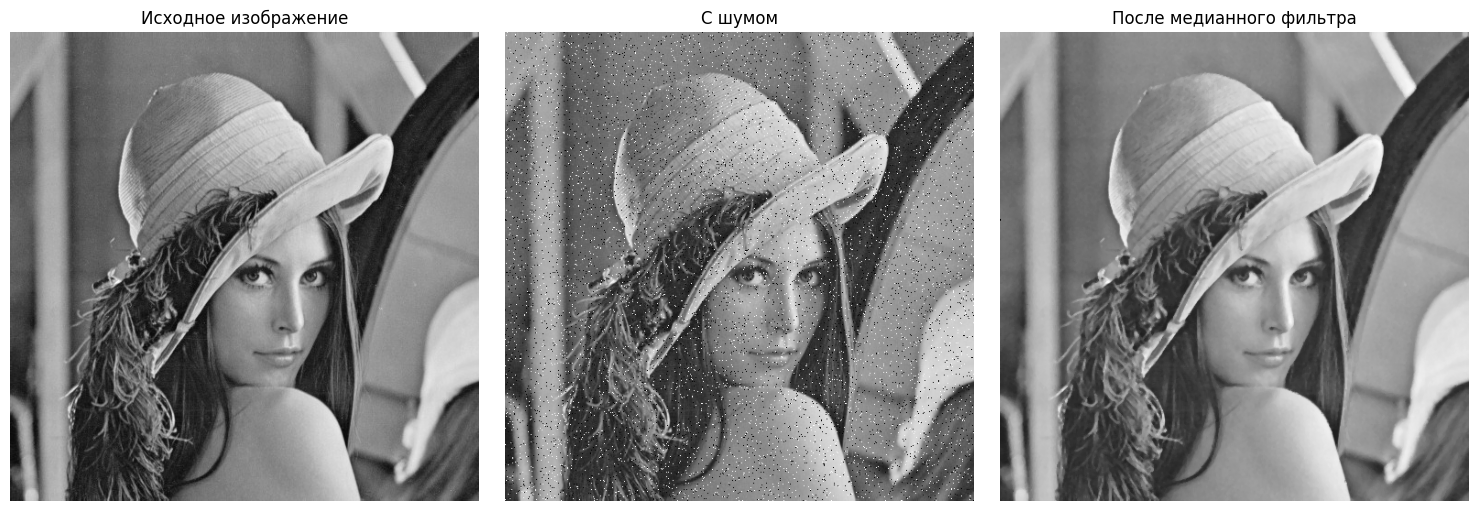

In [20]:
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
    
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'С шумом')
plt.axis('off')
    
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title(f'После медианного фильтра')
plt.axis('off')
    
plt.tight_layout()
plt.show()